# importing the required packages

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
#The code imports the pandas library as 'pd' and the SimpleImputer class from scikit-learn. It uses SimpleImputer to fill missing values in the 'FPDS Code' column of a DataFrame using the most frequent value.

# reading the csv files 

In [2]:
df1 = pd.read_csv('FY2015_archived_opportunities.csv',encoding='cp437')

#The code reads a CSV file named 'FY2015_archived_opportunities.csv' into a pandas DataFrame called 'df1'. It specifies the encoding as 'cp437' to handle any non-standard characters in the file.


/var/folders/9q/s74pfht965b9xn08c_00yg940000gn/T/ipykernel_52384/3938857808.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('FY2015_archived_opportunities.csv',encoding='cp437')


In [3]:
df2 = pd.read_csv('FY2016_archived_opportunities.csv',encoding='cp437')

#The code reads a CSV file named 'FY2016_archived_opportunities.csv' into a pandas DataFrame called 'df1'. It specifies the encoding as 'cp437' to handle any non-standard characters in the file.

In [4]:
df3 = pd.read_csv('FY2017_archived_opportunities.csv',encoding='cp437')
# The code reads a CSV file named 'FY2017_archived_opportunities.csv' into a pandas DataFrame called 'df1'. It specifies the encoding as 'cp437' to handle any non-standard characters in the file.

# assigning the dataframes to the variable

In [5]:
data = [df1, df2, df3] # assingning the dataframes to the variable data 

# concatinating the dataframes

In [6]:
df = pd.concat(data) # concatinating the dataframes

# displaying the shape of a dataframe

In [7]:
df.shape #shape of the dataframe

(1144877, 47)

# printing the columns which have more than 83% null values

In [8]:
# remove columns with null vallues > 83%

na_df=pd.DataFrame({'col_name':df.columns,'na_per':df.isnull().sum()/df.shape[0]*100}) 

na_grt75=list(na_df[na_df['na_per']>83]['col_name'])

na_grt75

['PrimaryContactFax',
 'SecondaryContactTitle',
 'SecondaryContactPhone',
 'SecondaryContactFax',
 'AdditionalInfoLink']

# displaying the information of the dataframe

In [9]:
df.info() #information of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144877 entries, 0 to 396215
Data columns (total 47 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   NoticeId                  1144877 non-null  object 
 1   Title                     1143912 non-null  object 
 2   Sol#                      1094401 non-null  object 
 3   Department/Ind.Agency     625230 non-null   object 
 4   CGAC                      625230 non-null   float64
 5   Sub-Tier                  625107 non-null   object 
 6   FPDS Code                 624174 non-null   object 
 7   Office                    625230 non-null   object 
 8   AAC Code                  625107 non-null   object 
 9   PostedDate                1144877 non-null  object 
 10  Type                      1144624 non-null  object 
 11  BaseType                  1144510 non-null  object 
 12  ArchiveType               1144877 non-null  object 
 13  ArchiveDate               11

# printing the total nan values in each column in the dataframe

In [10]:
df.isnull().sum() # printing the total nan values in each column in the dataframe

NoticeId                          0
Title                           965
Sol#                          50476
Department/Ind.Agency        519647
CGAC                         519647
Sub-Tier                     519770
FPDS Code                    520703
Office                       519647
AAC Code                     519770
PostedDate                        0
Type                            253
BaseType                        367
ArchiveType                       0
ArchiveDate                   11235
SetASideCode                 796225
SetASide                     796225
ResponseDeadLine             335078
NaicsCode                    121957
ClassificationCode             4369
PopStreetAddress             711522
PopCity                      867865
PopState                     874632
PopZip                       894099
PopCountry                   814619
Active                            0
AwardNumber                  866752
AwardDate                    866727
Award$                      

# displaying the title column of the dataframe

In [11]:
df["Title"].isnull().sum() # displaying the title column of the dataframe

965

# Filling the nan values of title column by unknown, as we cannot keep other names in which the data visualisation may be incorrect

In [12]:
df["Title"] = df["Title"].fillna("Unknown") #Filling the nan values of title column by unknown, as we cannot keep other names in which the data visualisation may be incorrect
df["Title"]

0                         California Flood Awareness Videos
1                      LED Lighting Retrofit at USACE Lakes
2                                Trash & Recycling Services
3                              S--OPTION - Uniform Services
4                    Z--Airfield Runway and Taxiway Repairs
                                ...                        
396211    D--799-17-1-307-0001 Polyanalyst Software Main...
396212                              Z--Install vehicle lift
396213    FY16 JOTC BUILDING REPLACEMENT, EAST RANGE, SC...
396214                         A--Obligate funds to CMU SEI
396215    A--Excercise of Option Year 3 for MITRE Engine...
Name: Title, Length: 1144877, dtype: object

# displaying the nan values in title column after filling the nan values

In [13]:
df["Title"].isnull().sum() #displaying the nan values in title column after filling the nan values

0

# displaying the sum of nan values in sol# column

In [14]:
df["Sol#"].isnull().sum() #displaying the sum of nan values in sol# column

50476

# Filling the nan values of sol# column with 0, as the sol# is unique number, so we cannot keep other numbers which may gives incorrect redult

In [15]:
df["Sol#"] = df["Sol#"].fillna(0) # filling the nan values with 0

# displaying the total null values in sol# column after filling the nan values

In [16]:
df["Sol#"].isnull().sum() # displaying the total null values in sol# column after filling the nan values

0

# finding the mode of Department/Ind.Agency column and filling the missing values by its mode value

In [17]:
mode_value = df['Department/Ind.Agency'].mode()[0] #findinf the mode
df['Department/Ind.Agency'] = df['Department/Ind.Agency'].fillna(mode_value) #filling the nan values with mode
df['Department/Ind.Agency'].head(10)

0                    DEPT OF DEFENSE
1                    DEPT OF DEFENSE
2    GENERAL SERVICES ADMINISTRATION
3                    DEPT OF DEFENSE
4                    DEPT OF DEFENSE
5                    DEPT OF DEFENSE
6                    DEPT OF DEFENSE
7                    DEPT OF DEFENSE
8                    DEPT OF DEFENSE
9                    DEPT OF DEFENSE
Name: Department/Ind.Agency, dtype: object

# displaying the sum of total null values in Department/Ind.Agency after filling with mode

In [18]:
df["Department/Ind.Agency"].isnull().sum() #printing the total nan values 

0

# filling the nan values in CGAC column by 0 as it is the unique value for each organization

In [19]:
df["CGAC"]=df["CGAC"].fillna(0.0) # filling the nan values with 0

# printing the sum of total nan values of CGAC column after filling

In [20]:
df["CGAC"].isnull().sum() # printing the sum of total null values

0

# filling the nan values of Sub-Tier column by unknown as we cannot keep other department which does not got any award

In [21]:
df['Sub-Tier'] = df['Sub-Tier'].fillna("Unknown") # filling the nan values by unknown

# displaying the Sub-Tier column of the dataframe

In [22]:
df['Sub-Tier'] # displaying the subtier column

0                        DEPT OF THE ARMY
1                        DEPT OF THE ARMY
2                PUBLIC BUILDINGS SERVICE
3                        DEPT OF THE NAVY
4                        DEPT OF THE NAVY
                       ...               
396211    VETERANS AFFAIRS, DEPARTMENT OF
396212                   DEPT OF THE NAVY
396213                   DEPT OF THE ARMY
396214                            Unknown
396215                            Unknown
Name: Sub-Tier, Length: 1144877, dtype: object

# displaying the sum of total nan values present in Sub-Tier column

In [23]:
df["Sub-Tier"].isnull().sum() # printing the sum of total null values

0

# filling the nan values of FPDS column by mode value

In [24]:
# Create a SimpleImputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fill the null values in the 'FPDS code' column with the mode value
df['FPDS Code'] = imputer.fit_transform(df[['FPDS Code']])
df['FPDS Code'].isnull().sum()

0

# filling the office address by unknown as we cannot keep other address of organization

In [25]:
df["Office"] = df["Office"].fillna("Unknown") # filling the offica column with unknown
df["Office"].isnull().sum()

0

# displaying the sum of total nan values of PostedDate column 

In [26]:
df["PostedDate"].isnull().sum() # printing the sum of total nan values

0

#  Extracting only the time components from the 'PostedDate' column 

In [27]:
df['PostedTime'] = df['PostedDate'].str[-8:] #extracting the last eight strings in postdate column
df['PostedTime']

0         59:08-04
1         56:11-04
2         50:38-04
3         47:29-04
4         46:13-04
            ...   
396211    25:18-04
396212    35:24-04
396213    03:49-04
396214    45:04-04
396215    45:02-04
Name: PostedTime, Length: 1144877, dtype: object

# Extracting the first ten date components into the new column

In [28]:
df['PostedDate']=df['PostedDate'].str[:10] # extracting the firdt ten strings 
df['PostedDate']

0         2015-09-30
1         2015-09-30
2         2015-09-30
3         2015-09-30
4         2015-09-30
             ...    
396211    2016-10-01
396212    2016-10-01
396213    2016-10-01
396214    2016-10-01
396215    2016-10-01
Name: PostedDate, Length: 1144877, dtype: object

# filling the setaside column with its mode value

In [29]:
column_mode = df["SetASideCode"].fillna(df["SetASideCode"].mode()[0]) 
# Fill missing values in that column with the column mode
df["SetASideCode"].fillna(column_mode, inplace=True)  # filling the nan values with mode
df["SetASideCode"]

0         SBA
1         SBA
2         SBA
3         SBA
4         SBA
         ... 
396211    SBA
396212    SBA
396213    SBA
396214    SBA
396215    SBA
Name: SetASideCode, Length: 1144877, dtype: object

# 

In [30]:
df["ResponseDeadLine"].head(10)    
#Since the response deadline contains both the time and date splitting the column into two columns
df['ResponseDeadLine']=df['PostedDate'].str[:10]
df['ResponseDeadLine']

0         2015-09-30
1         2015-09-30
2         2015-09-30
3         2015-09-30
4         2015-09-30
             ...    
396211    2016-10-01
396212    2016-10-01
396213    2016-10-01
396214    2016-10-01
396215    2016-10-01
Name: ResponseDeadLine, Length: 1144877, dtype: object

# filling the nan values with o in NaicsCode column

In [31]:
# Fill missing values in a specific column with a specified value
column_name = "NaicsCode"
fill_value = 0  # Specify the value to use for filling missing values
df[column_name].fillna(fill_value, inplace=True)
df['NaicsCode']

0         512110.0
1         238210.0
2         562111.0
3              0.0
4         237310.0
            ...   
396211    541519.0
396212    238910.0
396213    236220.0
396214    541712.0
396215    541990.0
Name: NaicsCode, Length: 1144877, dtype: float64

# filling the nan values with mode in classification column

In [32]:
df["ClassificationCode"] = df["ClassificationCode"].fillna(df["ClassificationCode"].mode()) # filling the nan values with mode
df["ClassificationCode"]

0         70
1          N
2         99
3          S
4          Z
          ..
396211     D
396212     Z
396213     Y
396214     A
396215     A
Name: ClassificationCode, Length: 1144877, dtype: object

In [33]:
df["PopStreetAddress"].head(20) # printing the top 20 rows

0                                                   NaN
1                                                   NaN
2             1 Federal Drive\r\nFt. Snelling, MN 55111
3                                                   NaN
4                                                   NaN
5     USACE- Copan Project Office 396120 St. Highway...
6                                   Lackland AFB, Texas
7                          Linden,, NJ 07036\n07036\nUS
8                  North Brunswick, NJ 08902\n08902\nUS
9                           LINDEN, NJ 07036\n07036\nUS
10                                                  NaN
11                                        Building 7525
12                                                  NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [34]:
df["PopStreetAddress"] = df["PopStreetAddress"].str.replace(r'\r|\n|\r\n', '')

/var/folders/9q/s74pfht965b9xn08c_00yg940000gn/T/ipykernel_52384/1131446444.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PopStreetAddress"] = df["PopStreetAddress"].str.replace(r'\r|\n|\r\n', '')


# filling the nan values with unknown in PopStreetAddress column

In [35]:
df["PopStreetAddress"] = df["PopStreetAddress"].fillna("Unknown") # filling the nan values with unknown in PopStreetAddress column
df["PopStreetAddress"].isnull().sum()

0

# filling the nan values with  mode in PopCity column

In [36]:
df["PopCity"] = df["PopCity"].fillna(df["PopCity"].mode()[0])
df["PopCity"]

0            WASHINGTON
1            WASHINGTON
2         FORT SNELLING
3            WASHINGTON
4            WASHINGTON
              ...      
396211       WASHINGTON
396212       WASHINGTON
396213       WASHINGTON
396214       WASHINGTON
396215       WASHINGTON
Name: PopCity, Length: 1144877, dtype: object

# filling the nan values with mode in PopState column

In [37]:
df["PopState"] = df["PopState"].fillna(df["PopState"].mode()[0]) # filling the nan values with mode 
df["PopState"]

0         VA
1         VA
2         MN
3         VA
4         VA
          ..
396211    VA
396212    VA
396213    VA
396214    VA
396215    VA
Name: PopState, Length: 1144877, dtype: object

In [38]:
df["PopZip"].tail(20) # displaying the last 20 rows

396196      NaN
396197    29403
396198      NaN
396199      NaN
396200      NaN
396201      NaN
396202      NaN
396203      NaN
396204    09870
396205    60604
396206    60604
396207      NaN
396208      NaN
396209      NaN
396210      NaN
396211      NaN
396212      NaN
396213      NaN
396214      NaN
396215      NaN
Name: PopZip, dtype: object

# filling the nan values with mode in popzip colimn

In [39]:
df["PopZip"] = df["PopZip"].fillna(df["PopZip"].mode()[0]) # filling the nan values with mode 
df["PopZip"]

0         23297
1         23297
2         55111
3         23297
4         23297
          ...  
396211    23297
396212    23297
396213    23297
396214    23297
396215    23297
Name: PopZip, Length: 1144877, dtype: object

In [40]:
# filling the nan values in popcountry with the mode

In [41]:
df["PopCountry"] = df["PopCountry"].fillna(df["PopCountry"].mode()[0]) # filling the nan values in popcountry with the mode
df["PopCountry"]

0         USA
1         USA
2         USA
3         USA
4         USA
         ... 
396211    USA
396212    USA
396213    USA
396214    USA
396215    USA
Name: PopCountry, Length: 1144877, dtype: object

# printing the sum of total nan values in active column

In [42]:
df["Active"].isnull().sum() # printing the sum of total nan values in active column

0

In [43]:
# filling the awardnumber column with unknown

In [44]:
df['AwardNumber'] = df['AwardNumber'].fillna("Unknown")  # filling the awardnumber column with unknown

In [45]:
df['AwardNumber'] # displaying the awardnumber column

0            W91238-15-P-0107
1            W91238-15-P-0098
2                     Unknown
3            N00244-15-P-0773
4               n6945015c1110
                 ...         
396211        VA250-16-P-2921
396212          N6247316C2837
396213       W9128A-16-C-0015
396214    FA870215D0002000209
396215          FA870217C0001
Name: AwardNumber, Length: 1144877, dtype: object

In [46]:
df["AwardDate"].head(20) # displaying the top twenty rows 

0     2015-09-30
1     2015-09-29
2            NaN
3     2015-09-30
4     2015-09-30
5     2015-09-30
6            NaN
7            NaN
8            NaN
9            NaN
10    2015-09-29
11    2015-09-30
12    2015-09-30
13    2015-09-30
14    2015-09-30
15    2015-09-30
16    2015-09-30
17    2015-09-30
18    2015-09-30
19    2015-09-30
Name: AwardDate, dtype: object

# filling the nan values with unknown in awarddate column

In [47]:
df['AwardDate'] = df['AwardDate'].fillna("Unknown") # filling the nan values with unknown in awarddate column
df["AwardDate"]

0         2015-09-30
1         2015-09-29
2            Unknown
3         2015-09-30
4         2015-09-30
             ...    
396211    2016-10-01
396212    2016-09-29
396213    2016-09-27
396214    2016-09-30
396215    2016-10-01
Name: AwardDate, Length: 1144877, dtype: object

# filling the nan values with unknown 

In [48]:
df['Awardee'] = df['Awardee'].fillna("Unknown") # filling the nan values with unknown
df['Awardee']

0                                   Goal Productions, Inc. 
1                                       Venergy Group, LLC 
2                                                   Unknown
3         UNIFIRST CORPORATION [DUNS: 019723535],68 Jons...
4                                      Head Inc./Ballew JV 
                                ...                        
396211    MEGAPUTER INTELLIGENCE INC;1600 W BLOOMFIELD R...
396212                              West Point Contractors 
396213    Alutiiq Manufacturing Contractors, LLC. 3909 A...
396214    CARNEGIE MELLON UNIVERSITY, SOFTWARE ENGINEERI...
396215    THE MITRE CORPORATION, 202 BURLINGTON RD, BEDF...
Name: Awardee, Length: 1144877, dtype: object

# filling the nan values with unknown

In [49]:
df['Awardee'] = df['Awardee'].fillna("Unknown") # filling the nan values with unknown

In [50]:
df['Awardee']

0                                   Goal Productions, Inc. 
1                                       Venergy Group, LLC 
2                                                   Unknown
3         UNIFIRST CORPORATION [DUNS: 019723535],68 Jons...
4                                      Head Inc./Ballew JV 
                                ...                        
396211    MEGAPUTER INTELLIGENCE INC;1600 W BLOOMFIELD R...
396212                              West Point Contractors 
396213    Alutiiq Manufacturing Contractors, LLC. 3909 A...
396214    CARNEGIE MELLON UNIVERSITY, SOFTWARE ENGINEERI...
396215    THE MITRE CORPORATION, 202 BURLINGTON RD, BEDF...
Name: Awardee, Length: 1144877, dtype: object

# filling the nan values of PrimaryContactTitle with mode

In [51]:
df["PrimaryContactTitle"] = df["PrimaryContactTitle"].fillna(df["PrimaryContactTitle"].mode()[0]) # filling the nan values of PrimaryContactTitle with mode
df["PrimaryContactTitle"]

0         Contract Specialist
1          Contract Specialst
2         Contracting Officer
3         Contract Specialist
4         Contract Specialist
                 ...         
396211    Contract Specialist
396212    Contract Specialist
396213    Contract Specialist
396214    Contract Specialist
396215    Contract Specialist
Name: PrimaryContactTitle, Length: 1144877, dtype: object

# replaces any occurrences of 'Contract Specialst' with 'Contract Specialist' in the 'PrimaryContactTitle' column.


In [52]:
df['PrimaryContactTitle'] = df['PrimaryContactTitle'].replace('Contract Specialst', 'Contract Specialist') # replaces any occurrences of 'Contract Specialst' with 'Contract Specialist' in the 'PrimaryContactTitle' column.

In [53]:
df["PrimaryContactTitle"]

0         Contract Specialist
1         Contract Specialist
2         Contracting Officer
3         Contract Specialist
4         Contract Specialist
                 ...         
396211    Contract Specialist
396212    Contract Specialist
396213    Contract Specialist
396214    Contract Specialist
396215    Contract Specialist
Name: PrimaryContactTitle, Length: 1144877, dtype: object

In [54]:
df["OrganizationType"].unique() # displaying the unique values

array(['OFFICE', nan, 'DEPARTMENT'], dtype=object)

# filling the nan values with mode

In [55]:
df["OrganizationType"] = df["OrganizationType"].fillna(df["OrganizationType"].mode()[0]) # filling the nan values with mode
df["OrganizationType"]

0         OFFICE
1         OFFICE
2         OFFICE
3         OFFICE
4         OFFICE
           ...  
396211    OFFICE
396212    OFFICE
396213    OFFICE
396214    OFFICE
396215    OFFICE
Name: OrganizationType, Length: 1144877, dtype: object

# filling the nan values of state column with mode

In [56]:
df["State"] = df["State"].fillna(df["State"].mode()[0]) # filling the nan values of state column with mode
df["State"]

0         CA
1         CA
2         IL
3         CA
4         FL
          ..
396211    OH
396212    CA
396213    HI
396214    VA
396215    VA
Name: State, Length: 1144877, dtype: object

# printing the sum of total nan values of city column

In [57]:
df["City"].isnull().sum() # printing the sum of total nan values of city column

519770

# filling the nan values of city column with zero

In [58]:
df["City"] = df["City"].fillna(df["City"].mode()[0]) # filling the nan values of city column with zero
df["City"]

0           SACRAMENTO
1           SACRAMENTO
2              CHICAGO
3            SAN DIEGO
4         JACKSONVILLE
              ...     
396211          DAYTON
396212       SAN DIEGO
396213    FORT SHAFTER
396214      WASHINGTON
396215      WASHINGTON
Name: City, Length: 1144877, dtype: object

# printing the top twenty rows

In [59]:
df["ZipCode"].head(20) # printing the top twenty rows

0     95814-2922
1     95814-2922
2          60604
3          92136
4     32212-0030
5     74137-4290
6     78236-5286
7            NaN
8            NaN
9            NaN
10    76311-2743
11    93437-5212
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18    90017-3409
19           NaN
Name: ZipCode, dtype: object

# splits the values in the 'ZipCode' column of a DataFrame at the hyphen ('-') and keeps only the first part of the spli

In [60]:
df['ZipCode'] = df['ZipCode'].str.split('-').str[0] # splits the values in the 'ZipCode' column of a DataFrame at the hyphen ('-') and keeps only the first part of the spli

In [61]:
df["ZipCode"].head(20) # printing the top twenty rows

0     95814
1     95814
2     60604
3     92136
4     32212
5     74137
6     78236
7       NaN
8       NaN
9       NaN
10    76311
11    93437
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18    90017
19      NaN
Name: ZipCode, dtype: object

# filling the nan values with zero in zipcode

In [62]:
df['ZipCode'] = df['ZipCode'].fillna("0") # filling the nan values with zero

In [63]:
df["ZipCode"].isnull().sum() # PRINTING THE SUM OF TOTAL NAN VALUES

0

# filling the nanvalues with mode in country code column

In [64]:
df["CountryCode"] = df["CountryCode"].fillna(df["CountryCode"].mode()[0]) # filling the nanvalues with mode in ciuntry code column
df["CountryCode"]

0         USA
1         USA
2         USA
3         USA
4         USA
         ... 
396211    USA
396212    USA
396213    USA
396214    USA
396215    USA
Name: CountryCode, Length: 1144877, dtype: object

In [65]:
df["Description"] # printing the column

0                                              award notice
1                                              Award Notice
2         This is a combined synopsis/solicitation for c...
3                                   No Description Provided
4                                   No Description Provided
                                ...                        
396211                              No Description Provided
396212                              No Description Provided
396213                                                  NaN
396214                              No Description Provided
396215                              No Description Provided
Name: Description, Length: 1144877, dtype: object

# filling the nan values with "No Description Provided" in unknown values

In [66]:
# filling the nan values with "No Description Provided" in unknown valuesdf['Description'] = df['Description'].fillna("No Description Provided") 

In [67]:
df['Description'].isnull().sum()

250736

# printing the sum of total nan values in description column

In [68]:
df.isnull().sum() # printing the sum of total nan values in description column

NoticeId                          0
Title                             0
Sol#                              0
Department/Ind.Agency             0
CGAC                              0
Sub-Tier                          0
FPDS Code                         0
Office                            0
AAC Code                     519770
PostedDate                        0
Type                            253
BaseType                        367
ArchiveType                       0
ArchiveDate                   11235
SetASideCode                      0
SetASide                     796225
ResponseDeadLine                  0
NaicsCode                         0
ClassificationCode             4369
PopStreetAddress                  0
PopCity                           0
PopState                          0
PopZip                            0
PopCountry                        0
Active                            0
AwardNumber                       0
AwardDate                         0
Award$                      

# removes all non-digit characters from the values in the 'Award$' column of a DataFrame

In [69]:
df['Award$']=df['Award$'].str.replace(r"\D","") # moves all non-digit characters from the values in the 'Award$' column of a DataFrame

df['Award$']

/var/folders/9q/s74pfht965b9xn08c_00yg940000gn/T/ipykernel_52384/1588169714.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Award$']=df['Award$'].str.replace(r"\D","") # moves all non-digit characters from the values in the 'Award$' column of a DataFrame


0             61036
1          13966243
2               NaN
3          10804900
4           7807565
            ...    
396211      6013300
396212     21195746
396213    315966300
396214      2139000
396215     29178588
Name: Award$, Length: 1144877, dtype: object

# converts the values in the 'Award$' column of a DataFrame to numeric data type using the pd.to_numeric() function

In [70]:
df["Award$"] = pd.to_numeric(df["Award$"], errors="coerce") #converts the values in the 'Award$' column of a DataFrame to numeric data type using the pd.to_numeric() function

In [71]:
df["Award$"]  # printing the award$  column

0             61036.0
1          13966243.0
2                 NaN
3          10804900.0
4           7807565.0
             ...     
396211      6013300.0
396212     21195746.0
396213    315966300.0
396214      2139000.0
396215     29178588.0
Name: Award$, Length: 1144877, dtype: float64

In [72]:
mean = df["Award$"].mean() # finding the mean

In [73]:
df["Award$"].fillna(mean, inplace=True) # filling the nan values in award$ with mean

In [74]:
df['Award$'] # printing the award$ column

0         6.103600e+04
1         1.396624e+07
2         3.211668e+63
3         1.080490e+07
4         7.807565e+06
              ...     
396211    6.013300e+06
396212    2.119575e+07
396213    3.159663e+08
396214    2.139000e+06
396215    2.917859e+07
Name: Award$, Length: 1144877, dtype: float64

# dropping the columns which has more nan values

In [75]:
df.drop(columns=['PrimaryContactEmail','PrimaryContactFax','PrimaryContactPhone','PrimaryContactFullname','SecondaryContactFullname','SecondaryContactTitle','SecondaryContactEmail','SecondaryContactPhone','SecondaryContactFax','AdditionalInfoLink','ClassificationCode'], axis=1,inplace = True)

# dropping the columns which has more nan values

In [76]:
df.shape # printing the shape of the data frame

(1144877, 37)

# filling the nan values in archivedate column with unknown

In [77]:
df["ArchiveDate"] = df["ArchiveDate"].fillna("Unknown") # filling the nan values in archivedate column with unknown

In [78]:
df["ArchiveDate"].isnull().sum() # printing the sum of total nan values in archiva date

0

# filling the nan values in AAC code with mode

In [79]:
df["AAC Code"] = df["AAC Code"].fillna(df["AAC Code"].mode()[0]) # filling the nan values in AAC code with mode
df["AAC Code"].isnull().sum()

0

# filling the nan values with the mode in type column

In [80]:
df["Type"]=df["Type"].fillna(df["Type"].mode()[0]) # filling the nan  values with the mode in type column
df["Type"]

0                           Award Notice
1                           Award Notice
2         Combined Synopsis/Solicitation
3                           Award Notice
4                           Award Notice
                       ...              
396211                      Award Notice
396212                      Award Notice
396213                      Award Notice
396214                      Award Notice
396215                      Award Notice
Name: Type, Length: 1144877, dtype: object

# filling the nan values in basetype with mode

In [81]:
df["BaseType"]=df["BaseType"].fillna(df["BaseType"].mode()[0]) # filling the nan values in basetype with mode

In [82]:
df["BaseType"] # printing the basetype column

0                        Presolicitation
1                        Presolicitation
2         Combined Synopsis/Solicitation
3         Combined Synopsis/Solicitation
4                        Presolicitation
                       ...              
396211    Combined Synopsis/Solicitation
396212                      Award Notice
396213                   Presolicitation
396214                      Award Notice
396215                      Award Notice
Name: BaseType, Length: 1144877, dtype: object

In [83]:
df["BaseType"].isnull().sum() # PRINTING THE SUM OF TOTAL NAN VALUES IN BASETYPE COLUMN

0

In [84]:
df.columns # printing the  columns in dataframe

Index(['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'CGAC',
       'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type',
       'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide',
       'ResponseDeadLine', 'NaicsCode', 'PopStreetAddress', 'PopCity',
       'PopState', 'PopZip', 'PopCountry', 'Active', 'AwardNumber',
       'AwardDate', 'Award$', 'Awardee', 'PrimaryContactTitle',
       'OrganizationType', 'State', 'City', 'ZipCode', 'CountryCode', 'Link',
       'Description', 'PostedTime'],
      dtype='object')

In [85]:
df.isnull().sum() # printing the sum of total nan values in dataframe

NoticeId                      0
Title                         0
Sol#                          0
Department/Ind.Agency         0
CGAC                          0
Sub-Tier                      0
FPDS Code                     0
Office                        0
AAC Code                      0
PostedDate                    0
Type                          0
BaseType                      0
ArchiveType                   0
ArchiveDate                   0
SetASideCode                  0
SetASide                 796225
ResponseDeadLine              0
NaicsCode                     0
PopStreetAddress              0
PopCity                       0
PopState                      0
PopZip                        0
PopCountry                    0
Active                        0
AwardNumber                   0
AwardDate                     0
Award$                        0
Awardee                       0
PrimaryContactTitle           0
OrganizationType              0
State                         0
City    

# Hypothesis Testing

### H-1

#### Null Hypothesis: there is no relation with the popcountry with the award, i.e., the awards is not given based on the country.

#### Alternate Hypothesis: There is relation between popcountry and award, i.e., the award is given based on the country

In [86]:
from scipy.stats import f_oneway

# the above code using for loop

Country=df['PopCountry'].value_counts().index

p_value=f_oneway(*([df[df['PopCountry']==ele]['Award$'] for ele in Country]))[1]
    
print(p_value)

0.9999999999999999


#### so above p-value=1 which is more than S.L(significance level=0.05)
#### so if p-value>S.L, then Fail to reject Ho --> Accept there is no co-relation
#### conclusion is there is no co-relation, the award is not given based on the country

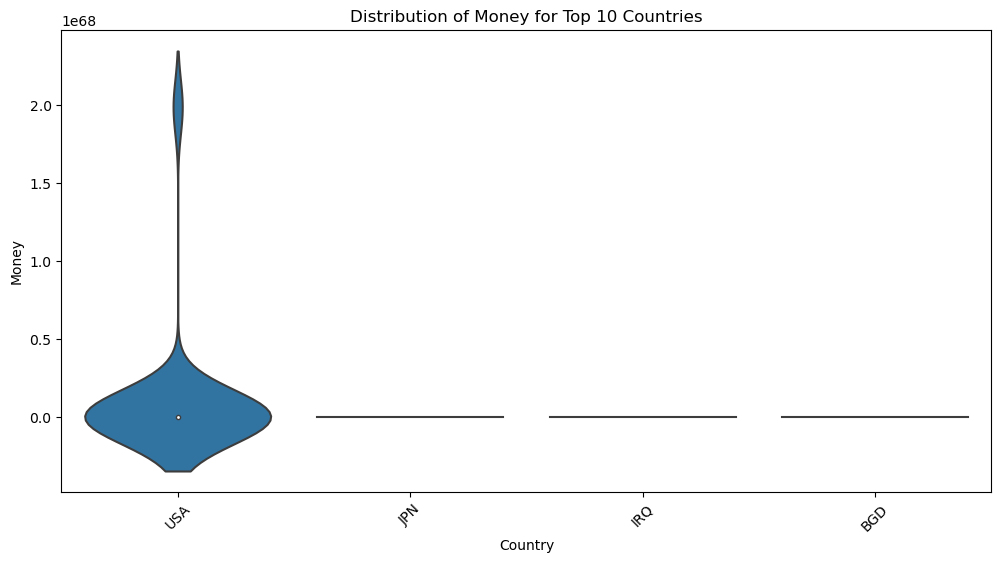

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.nlargest(90, 'Award$')

plt.figure(figsize=(12, 6))
sns.violinplot(x=top_countries['PopCountry'], y=top_countries['Award$'])
plt.xlabel('Country')
plt.ylabel('Money')
plt.title('Distribution of Money for Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

In [88]:
from scipy.stats import f_oneway

# the above code using for loop

state=df['PopState'].value_counts().index

p_value=f_oneway(*([df[df['PopState']==ele]['Award$'] for ele in state]))[1]
    
print(p_value)

0.9999999999999999


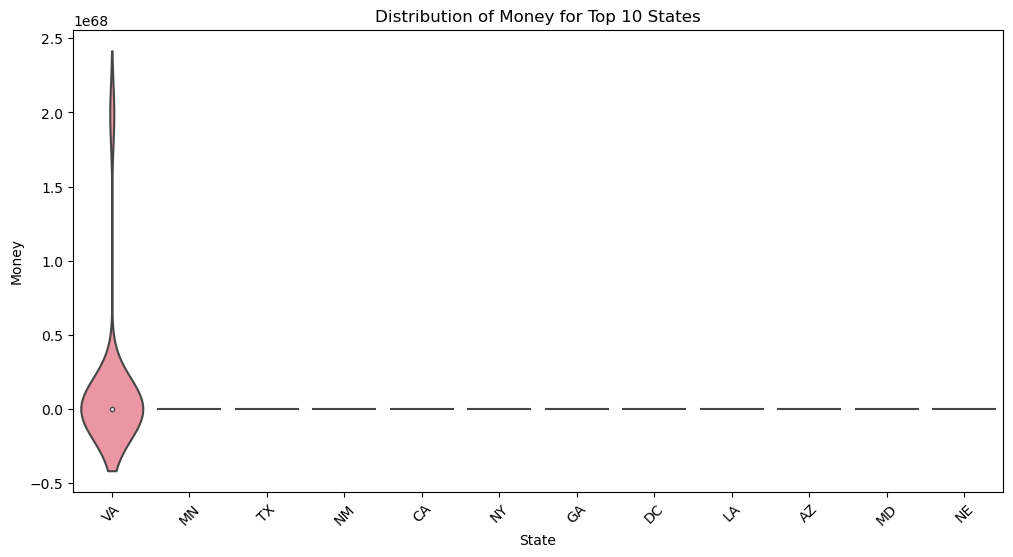

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

top_states = df.nlargest(90, 'Award$')

plt.figure(figsize=(12, 6))
sns.violinplot(x=top_states['PopState'], y=top_states['Award$'])
plt.xlabel('State')
plt.ylabel('Money')
plt.title('Distribution of Money for Top 10 States')
plt.xticks(rotation=45)
plt.show()

#### H-2

#### Null Hypothesis: There is no relationship between organization and award, i.e., the award is  not given base don the organization.

#### Alternate Hypothesis: There is relationship between organization and award, i.e., the award is given based on the organizatiom

In [90]:
df['Title'].nunique()

414807

from scipy.stats import f_oneway

Tit=df['Title'].value_counts().index

p_value=f_oneway(*([df[df['Title']==ele]['Award$'] for ele in Tit]))[1]
    
print(p_value)

In [91]:
df['OrganizationType'].nunique()

2

In [92]:
from scipy.stats import f_oneway

# the above code using for loop

Org=df['OrganizationType'].value_counts().index

p_value=f_oneway(*([df[df['OrganizationType']==ele]['Award$'] for ele in Org]))[1]
    
print(p_value)

0.9962697536265108


#### so above p-value=1 which is more than S.L(significance level=0.05)
#### so if p-value>S.L, then Fail to reject Ho --> Accept there is no co-relation
#### conclusion is there is no co-relation and award is not given based on the organization type

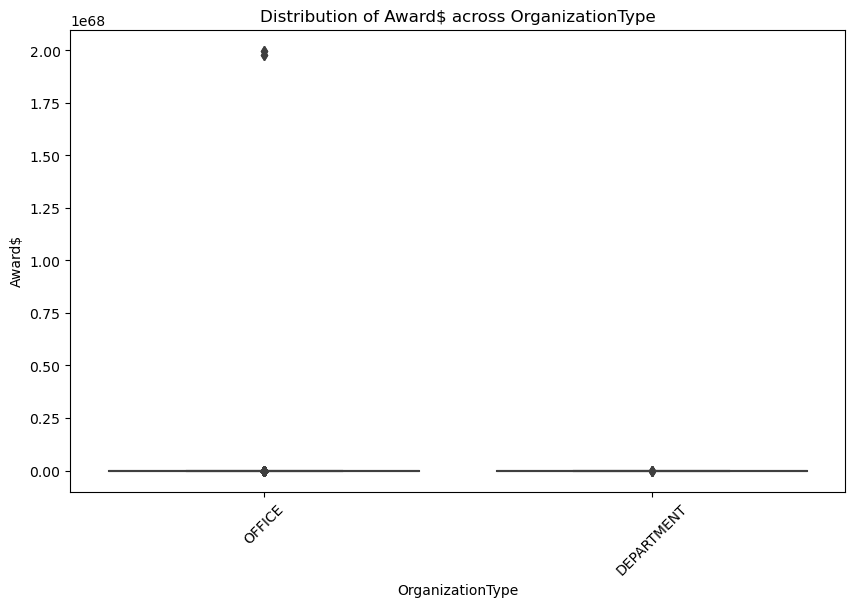

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='OrganizationType', y='Award$', data=df)
plt.xlabel('OrganizationType')
plt.ylabel('Award$')
plt.title('Distribution of Award$ across OrganizationType')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

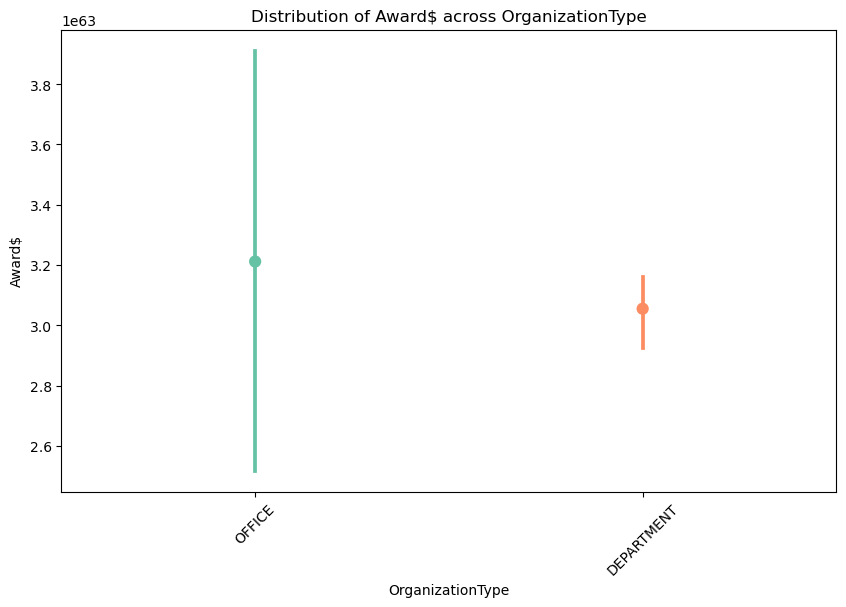

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.pointplot(x='OrganizationType', y='Award$', data=df, palette='Set2')
plt.xlabel('OrganizationType')
plt.ylabel('Award$')
plt.title('Distribution of Award$ across OrganizationType')
plt.xticks(rotation=45)
plt.show()

### H-3

#### Null Hypothesis: There is no relationship nbetween title and awards, i.e.,  the award is not given based on the brand

#### Alternate Hypothesis: There is relationship between title and award, i.e., The award is given based on the brand

In [95]:
import numpy as np
from scipy.stats import f_oneway

titl = df.groupby('Title')['Award$'].apply(np.array).values
p_value = f_oneway(*titl)[1]

print(p_value)


0.0


#### so above p-value=0 which is less than S.L(significance level=0.05)
#### so if p-value<S.L, then reject Ho --> Reject there is no co-relation
#### conclusion is there is co-relation,  the award is not given based on the brand

In [96]:
con_cols=[col for col in df.columns if df[col].dtype=='int64' or df[col].dtype=='float64']

cat_cols=[col for col in df.columns if df[col].dtype=='object']

print(con_cols)

print(cat_cols)

['CGAC', 'NaicsCode', 'Award$']
['NoticeId', 'Title', 'Sol#', 'Department/Ind.Agency', 'Sub-Tier', 'FPDS Code', 'Office', 'AAC Code', 'PostedDate', 'Type', 'BaseType', 'ArchiveType', 'ArchiveDate', 'SetASideCode', 'SetASide', 'ResponseDeadLine', 'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry', 'Active', 'AwardNumber', 'AwardDate', 'Awardee', 'PrimaryContactTitle', 'OrganizationType', 'State', 'City', 'ZipCode', 'CountryCode', 'Link', 'Description', 'PostedTime']


### H-4

#### Null Hypothesis: There is no relation between FPDS code and Award, i.e., The award is not given based on the FPDS code.
#### Alternate Hypothesis: There is relation between FPDS code and award, i.e., The award is given based on the FPDS code

In [97]:
df['FPDS Code']

0         2100
1         2100
2         4740
3         1700
4         1700
          ... 
396211    3600
396212    1700
396213    2100
396214    1700
396215    1700
Name: FPDS Code, Length: 1144877, dtype: object

In [98]:
df['FPDS Code'].dtype

dtype('O')

In [99]:
import pandas as pd
import numpy as np

# Replace non-numeric values with NaN
df['FPDS Code'] = pd.to_numeric(df['FPDS Code'], errors='coerce')

# Convert the column to int64
df['FPDS Code'] = df['FPDS Code'].astype('Int64')


In [100]:
df['FPDS Code'].dtype

Int64Dtype()

In [101]:
import scipy.stats as stats

# Convert the columns to numeric
df['FPDS Code'] = pd.to_numeric(df['FPDS Code'], errors='coerce')
df['Award$'] = pd.to_numeric(df['Award$'], errors='coerce')

# Remove rows with NaN values in either column
df = df[df['FPDS Code'].notna() & df['Award$'].notna()]

# Calculate correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df['FPDS Code'], df['Award$'])

print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)


Pearson correlation coefficient: 0.10517142842495987
p-value: 0.0


con = df.groupby('PrimaryContactTitle')['Award$'].apply(np.array).values
p_value = f_oneway(*con)[1]

print(p_value)


#### so above p-value=0 which is less than S.L(significance level=0.05)
#### so if p-value<S.L, then reject Ho --> Reject there is no co-relation
#### conclusion is there is co-relation and award is not given base on the FPDS code



# DATA VISUALIZATION

# Using the Scatter Plot to display the number of awards awarded in each month with respect to the year

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['PostedDate'] = pd.to_datetime(df['PostedDate'])

In [ ]:
df['POP-YEAR'] = df['PostedDate'].dt.year

In [ ]:
df['POP-YEAR']

In [ ]:
df['POP-MONTH'] = df['PostedDate'].dt.month

In [ ]:
df['POP-MONTH']

In [ ]:
plt.scatter(df['POP-YEAR'],df['POP-MONTH'])
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Awarded Contracts of each month in 3 years ')
plt.show()

# Top 10 Departments or Agencies 

In [ ]:
import plotly.graph_objects as go
import sys
import math
import unidecode
import seaborn as sb
sb.set_style("darkgrid")

In [ ]:
sector = df['Department/Ind.Agency'].value_counts().sort_values(ascending = False)

In [ ]:
a = sector.head(10)

In [ ]:
plt.figure(figsize = (10,5))
ax = sb.barplot(x = a, y = a.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Departments/Acengies')
plt.show()

# Amount Rewarded In 4 Years

In [ ]:
df['PostedDate'] = pd.to_datetime(df['PostedDate'], format='%Y-%m-%d')

In [ ]:
df['POPYear'] = df['PostedDate'].dt.year #creating a new column i.e., month

In [ ]:
monthly_revenue = df.groupby('POPYear')['Award$'].sum()#grouping the month column with respect to sales prce

In [ ]:
monthly_revenue.plot(kind='bar')     #plotting the bar graph
plt.xlabel('Years')
plt.ylabel('Amount in Dollars')
plt.title('Yearly Awards')
plt.show()

# Amount Rewarded In Each month in 4 years

In [ ]:
df['POPMonth'] = df['PostedDate'].dt.month_name() #creating a new column i.e., month
monthly_revenue = df.groupby('POPMonth')['Award$'].sum()#grouping the month column with respect to sales prce
monthly_revenue.plot(kind='bar')     #plotting the bar graph
plt.xlabel('Month')
plt.ylabel('Revenue in Dollars')
plt.title('Monthly Award Price')
plt.show()

# Top 10 sub-level Organization In the Dataset

In [ ]:
list1=df['Sub-Tier'].value_counts()[1:] #creating the list of total car sales for each make
list1

In [ ]:
# sub-level Organization 
li=[0.3]
for x in range(1,10):
    li.append(0)
    
list1[0:10].plot(kind='pie',autopct='%.0f%%',explode=li)

# Money Rewarded in within each Opportunity Type

In [ ]:
# Calculate the mean discount by car make
mean_discount_by_make = df.groupby('BaseType')['Award$'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(15,10))
sb.barplot(data=mean_discount_by_make, x='BaseType', y='Award$')
plt.xticks(rotation=90)
plt.xlabel('Opportunity Type')
plt.ylabel('Rewarded Amount')
plt.title('Opportunity Type with respect to Amount rewarded')
plt.show()

# Highlited the Office countries in the World

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the country codes to highlight
highlight_countries = df["CountryCode"].unique()

# Filter the world dataframe based on the country codes
highlighted_countries = world[world['iso_a3'].isin(highlight_countries)]

# Plot the world map
world.plot(figsize=(12, 6), color='lightgray')

# Plot the highlighted countries
highlighted_countries.plot(ax=plt.gca(), color='red')

# Set the plot title
plt.title('Office Counties')

# Show the plot
plt.show()
